<a href="https://colab.research.google.com/github/robert-pineau/CIND-820-Capstone/blob/main/cind820_rpineau_module2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import sys
from google.colab import drive
import pandas as pd 
import numpy as np
from scipy import stats 
import plotly
import matplotlib.pyplot as plt 
import seaborn as sns 

In [11]:
# Mounting google colab, this will prompt first time each session.
drive.mount('/content/drive',force_remount=True)
dataset_file = "/content/drive/My Drive/Colab Notebooks/heart_statlog_cleveland_hungary_final.csv"
df=pd.read_csv(dataset_file,sep=',')
df.head(3)

Mounted at /content/drive


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0


In [12]:
#Rename the columns to be nicer, no spaces.
df=df.rename(columns={"age": "Age", "sex": "Sex", "chest pain type": "ChestPainType", "resting bp s": "RestingBP_s",})
df=df.rename(columns={"cholesterol":"Cholesterol","fasting blood sugar": "FastingBloodSugar"})
df=df.rename(columns={"chest pain type": "ChestPainType", "resting bp s": "RestingBP_s", "fasting blood sugar": "FastingBloodSugar"})
df=df.rename(columns={"resting ecg": "RestingECG", "max heart rate": "MaxHeartRate", "exercise angina": "ExerciseAngina"})
df=df.rename(columns={"oldpeak":"OldPeak", "ST slope": "ST_Slope", "target": "Target"})

df.head(3)

,Age,Sex,ChestPainType,RestingBP_s,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExerciseAngina,OldPeak,ST_Slope,Target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0


In [13]:
#Check data types.
print(df.dtypes)

Age                    int64
Sex                    int64
ChestPainType          int64
RestingBP_s            int64
Cholesterol            int64
FastingBloodSugar      int64
RestingECG             int64
MaxHeartRate           int64
ExerciseAngina         int64
OldPeak              float64
ST_Slope               int64
Target                 int64
dtype: object


In [14]:
#Datatypes, counts, etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                1190 non-null   int64  
 1   Sex                1190 non-null   int64  
 2   ChestPainType      1190 non-null   int64  
 3   RestingBP_s        1190 non-null   int64  
 4   Cholesterol        1190 non-null   int64  
 5   FastingBloodSugar  1190 non-null   int64  
 6   RestingECG         1190 non-null   int64  
 7   MaxHeartRate       1190 non-null   int64  
 8   ExerciseAngina     1190 non-null   int64  
 9   OldPeak            1190 non-null   float64
 10  ST_Slope           1190 non-null   int64  
 11  Target             1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [15]:
#Check for NULL or missing entries. (none)
print(df.isna().any())
print("\n\n")
print(df.isnull().any())

Age                  False
Sex                  False
ChestPainType        False
RestingBP_s          False
Cholesterol          False
FastingBloodSugar    False
RestingECG           False
MaxHeartRate         False
ExerciseAngina       False
OldPeak              False
ST_Slope             False
Target               False
dtype: bool



Age                  False
Sex                  False
ChestPainType        False
RestingBP_s          False
Cholesterol          False
FastingBloodSugar    False
RestingECG           False
MaxHeartRate         False
ExerciseAngina       False
OldPeak              False
ST_Slope             False
Target               False
dtype: bool


In [16]:
#Look for rows that are 100% identical to each other.
#
dup_count = sum(df.duplicated())
print(f"There are {dup_count} duplicate rows in this dataset.\n")

#Droping any duplicate entries.
df = df.drop_duplicates(ignore_index = True)

df.info()

There are 272 duplicate rows in this dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   Sex                918 non-null    int64  
 2   ChestPainType      918 non-null    int64  
 3   RestingBP_s        918 non-null    int64  
 4   Cholesterol        918 non-null    int64  
 5   FastingBloodSugar  918 non-null    int64  
 6   RestingECG         918 non-null    int64  
 7   MaxHeartRate       918 non-null    int64  
 8   ExerciseAngina     918 non-null    int64  
 9   OldPeak            918 non-null    float64
 10  ST_Slope           918 non-null    int64  
 11  Target             918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [17]:
#Originally outlier detection for Numeric attributes was here.
#however, it made sense to move it to after the visualization stage.

#Out of bounds detection for nominal/binary attributes will remain before the visualization.

In [18]:
#Check for out of bound entries(outliers) for nominal and binary attributes (including the class variable)
#Since all nominal and binary attributes have a valid contiguous integer range, ie 0-1, or 1-4, we dont need to look at each value for correctness,
#we only need to look for those outside the range.
valid_values = {'Sex': [0,1], 'ChestPainType': [1,2,3,4], 'FastingBloodSugar': [0,1], 'RestingECG': [0,1,2], 'ExerciseAngina':[0,1], 'ST_Slope': [1,2,3], 'Target': [0,1]}

for col in ('Sex', 'ChestPainType', 'FastingBloodSugar', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'Target'):
  valid = np.array(valid_values[col])
  max_valid = valid.max()
  min_valid = valid.min()
  print(f"For attribute '{col}': Valid MAX: {max_valid}, Valid MIN: {min_valid}")
  these_outliers = df[((df[col] < min_valid) | (df[col] > max_valid))]

  if (these_outliers.shape[0] > 1):
    print(f"For attribute '{col}': There are {these_outliers.shape[0]} outliers:\n")
    print(these_outliers)
    print("\n\n")
  elif (these_outliers.shape[0] == 1):
    print(f"For attribute '{col}': There is {these_outliers.shape[0]} outlier:\n")
    print(these_outliers)
    print("\n\n")
  else:
    print(f"For attribute '{col}': There are no outliers.\n")

For attribute 'Sex': Valid MAX: 1, Valid MIN: 0
For attribute 'Sex': There are no outliers.

For attribute 'ChestPainType': Valid MAX: 4, Valid MIN: 1
For attribute 'ChestPainType': There are no outliers.

For attribute 'FastingBloodSugar': Valid MAX: 1, Valid MIN: 0
For attribute 'FastingBloodSugar': There are no outliers.

For attribute 'RestingECG': Valid MAX: 2, Valid MIN: 0
For attribute 'RestingECG': There are no outliers.

For attribute 'ExerciseAngina': Valid MAX: 1, Valid MIN: 0
For attribute 'ExerciseAngina': There are no outliers.

For attribute 'ST_Slope': Valid MAX: 3, Valid MIN: 1
For attribute 'ST_Slope': There is 1 outlier:

     Age  Sex  ChestPainType  RestingBP_s  Cholesterol  FastingBloodSugar  \
516   68    1              3          150          195                  1   

     RestingECG  MaxHeartRate  ExerciseAngina  OldPeak  ST_Slope  Target  
516           0           132               0      0.0         0       1  



For attribute 'Target': Valid MAX: 1, Valid

In [19]:
#From above, there is a problem with one entry regarding the ST_Slope attribute, it is zero, when all others are 1-3
#
#The documentation at https://ieee-dataport.org/open-access/heart-disease-dataset-comprehensive
#Shows a range of 0-2, but in the definition of the mapped nominal values it shows:
#
# -- Value 1: upsloping
# -- Value 2: flat
# -- Value 3: downsloping
#
print(df['ST_Slope'].value_counts().sort_index())
print("\n")
#
#
#Since there is only one entry out of range, making the assumption that the correct range is 1-3, and not 0-2, therefore the single entry with a value of 0 is out of bounds.
#
#Will simply drop this entry.
df = df[df['ST_Slope'] != 0]
df.info()

0      1
1    395
2    459
3     63
Name: ST_Slope, dtype: int64


<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 917
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                917 non-null    int64  
 1   Sex                917 non-null    int64  
 2   ChestPainType      917 non-null    int64  
 3   RestingBP_s        917 non-null    int64  
 4   Cholesterol        917 non-null    int64  
 5   FastingBloodSugar  917 non-null    int64  
 6   RestingECG         917 non-null    int64  
 7   MaxHeartRate       917 non-null    int64  
 8   ExerciseAngina     917 non-null    int64  
 9   OldPeak            917 non-null    float64
 10  ST_Slope           917 non-null    int64  
 11  Target             917 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 93.1 KB


In [20]:
#Basic Statistics of the dataset.(Measures of Center/Central Tendency, and Measures of Variability)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,917.0,53.495093,9.425601,28.0,47.0,54.0,60.0,77.0
Sex,917.0,0.789531,0.407864,0.0,1.0,1.0,1.0,1.0
ChestPainType,917.0,3.251908,0.931502,1.0,3.0,4.0,4.0,4.0
RestingBP_s,917.0,132.377317,18.515114,0.0,120.0,130.0,140.0,200.0
Cholesterol,917.0,198.803708,109.443764,0.0,173.0,223.0,267.0,603.0
FastingBloodSugar,917.0,0.232279,0.422517,0.0,0.0,0.0,0.0,1.0
RestingECG,917.0,0.604144,0.806161,0.0,0.0,0.0,1.0,2.0
MaxHeartRate,917.0,136.814613,25.473732,60.0,120.0,138.0,156.0,202.0
ExerciseAngina,917.0,0.404580,0.491078,0.0,0.0,0.0,1.0,1.0
OldPeak,917.0,0.888332,1.066749,-2.6,0.0,0.6,1.5,6.2


In [21]:
#Assigning descriptive labels for all possible values for all nominal/binary attributes.
#
labels = {'Sex': ['Female', 'Male'], 'ChestPainType': ['Typical Angina', 'A-Typical Angina', 'Non-Anginal Pain', 'Asymptomatic'], 
          'FastingBloodSugar': ['<= 120 mg/dl', '> 120 mg/dl'], 'RestingECG': ['Normal', 'ST-T Abnormality', 'Probable Left Ventricular Hypertrophy'],
          'ExerciseAngina':['No', 'Yes'], 'ST_Slope': ['Upsloping', 'Flat', 'Downsloping'], 'Target': ['Without Heart Disease', 'Has Heart Disease']}



In [22]:
#Creating subsets of the data for a series of interesting plots to help with visualization of the data.
#
#Breaking up the dataset into two groups, those with heart disease and those without.
with_heart_disease = df[df['Target'] == 1]
no_heart_disease = df[df['Target'] == 0]

#Breaking up the dataset into four groups, by Sex, and those with heart disease and those without.
with_heart_disease_male = df[(df['Target'] == 1) & (df['Sex'] == 1)]
with_heart_disease_female = df[(df['Target'] == 1) & (df['Sex'] == 0)]
no_heart_disease_male = df[(df['Target'] == 0) & (df['Sex'] == 1)]
no_heart_disease_female = df[(df['Target'] == 0) & (df['Sex'] == 0)]

#For these groups remove the "Sex" column from the data.
with_heart_disease_male = with_heart_disease_male.drop("Sex",axis=1)
with_heart_disease_female = with_heart_disease_female.drop("Sex",axis=1)
no_heart_disease_male = no_heart_disease_male.drop("Sex",axis=1)
no_heart_disease_female = no_heart_disease_female.drop("Sex",axis=1)

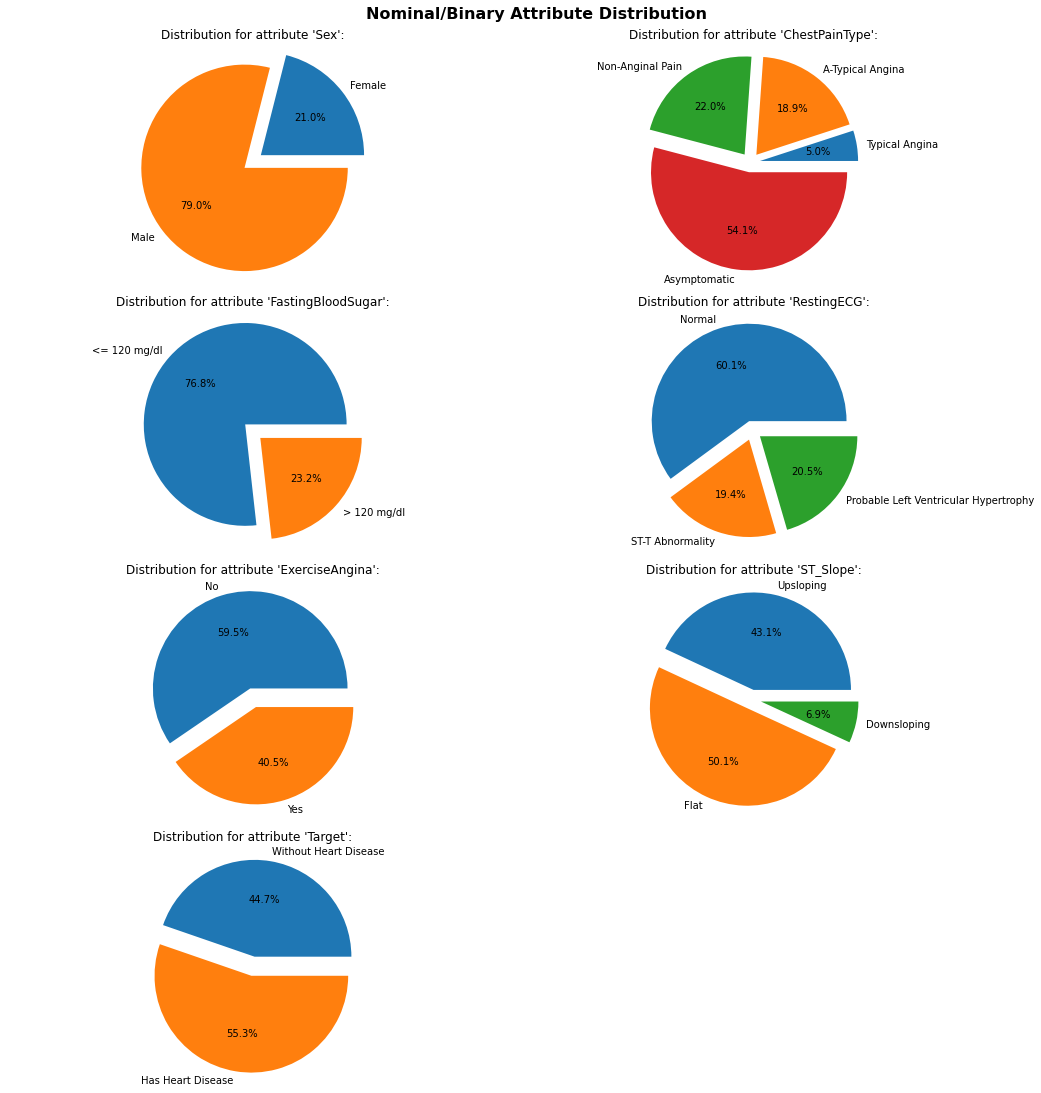

In [23]:
#Visualizing the distribution of the categorical attributes, including the class variable.
ax=1
plt.figure(figsize=(15,15))

for col in ('Sex', 'ChestPainType', 'FastingBloodSugar', 'RestingECG', 'ExerciseAngina','ST_Slope', 'Target'):
  plt.subplot(4,2,ax)
  these_labels = labels[col]
  plt.title(f"Distribution for attribute '{col}':")
  plt.pie(df[col].value_counts().sort_index(),
        autopct = '%1.1f%%', labels=these_labels,
        explode=tuple([0.1] * len(these_labels)))
  plt.axis('equal')
  ax+=1

plt.suptitle('Nominal/Binary Attribute Distribution',y=1.01, size = 16, color = 'black', weight='bold')   
plt.tight_layout()
plt.savefig("nominal_dist.pdf",dpi=1200, bbox_inches='tight')

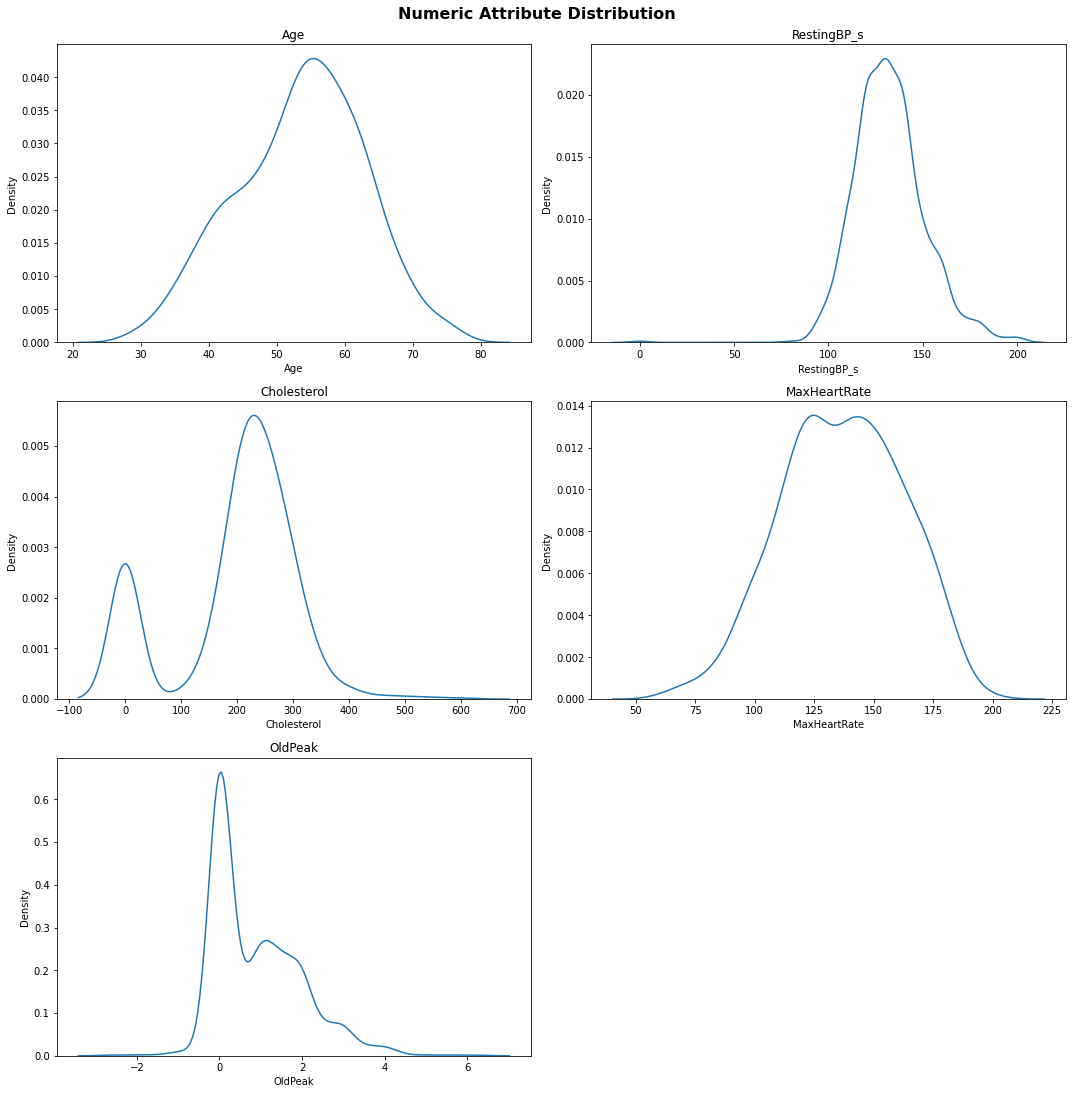

In [24]:
#Visualizing the overall distribution of the numeric attributes.
plt.figure(figsize=(15,15))

ax=1
for col in ('Age', 'RestingBP_s', 'Cholesterol', 'MaxHeartRate', 'OldPeak'):
    plt.subplot(3,2,ax)
    plt.title(col)
    sns.kdeplot(x=df[col])
    ax += 1

plt.suptitle('Numeric Attribute Distribution',y=1.01, size = 16, color = 'black', weight='bold')   
plt.tight_layout()
plt.savefig("numeric_dist.pdf",dpi=1200, bbox_inches='tight')

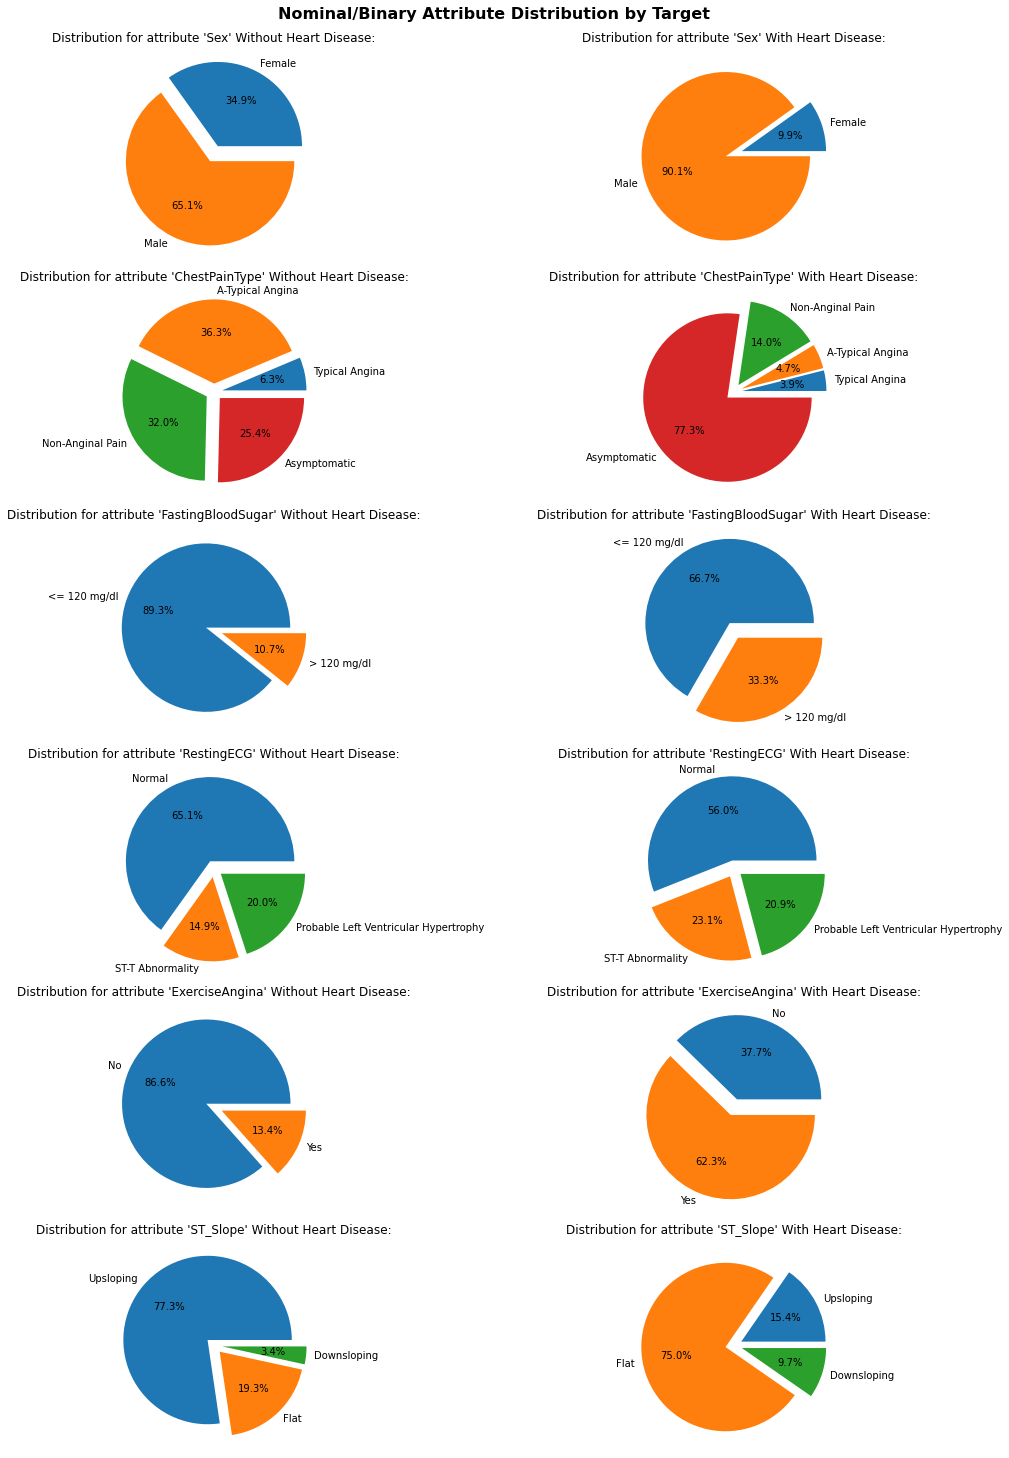

In [25]:
#Visualizing the distribution of the categorical attributes, by target
ax=1
plt.figure(figsize=(15,20))
plt.axis('equal')
  
for col in ('Sex','ChestPainType', 'FastingBloodSugar', 'RestingECG', 'ExerciseAngina','ST_Slope'):
  plt.subplot(6,2,ax)
  these_labels = labels[col]
  plt.title(f"Distribution for attribute '{col}' Without Heart Disease:")
  plt.pie(no_heart_disease[col].value_counts().sort_index(),
        autopct = '%1.1f%%', labels=these_labels,
        explode=tuple([0.1] * len(these_labels)))
  ax+=1
  plt.subplot(6,2,ax)
  these_labels = labels[col]
  plt.title(f"Distribution for attribute '{col}' With Heart Disease:")
  plt.pie(with_heart_disease[col].value_counts().sort_index(),
        autopct = '%1.1f%%', labels=these_labels,
        explode=tuple([0.1] * len(these_labels)))
  ax+=1

plt.suptitle('Nominal/Binary Attribute Distribution by Target',y=1.01, size = 16, color = 'black', weight='bold')
plt.tight_layout()
plt.savefig("nominal_dist_by_target.pdf",dpi=1200, bbox_inches='tight')

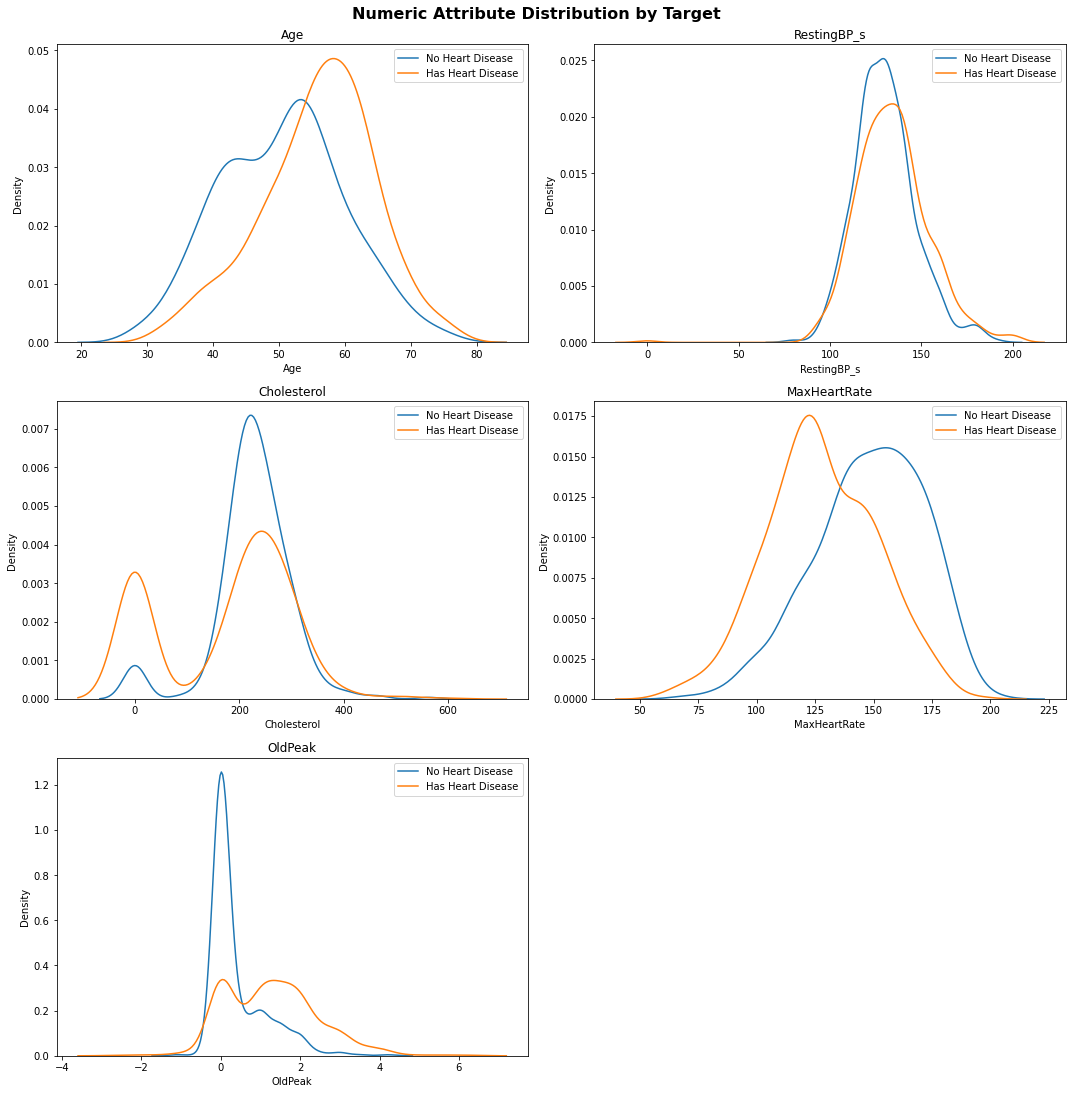

In [26]:
#Visualizing the distribution of the numeric attributes by Target:
plt.figure(figsize=(15,15))

ax=1
for col in ('Age', 'RestingBP_s', 'Cholesterol', 'MaxHeartRate', 'OldPeak'):
    plt.subplot(3,2,ax)
    plt.title(col)
    sns.kdeplot(x=no_heart_disease[col],label = "No Heart Disease")
    sns.kdeplot(x=with_heart_disease[col],label = "Has Heart Disease")
    plt.legend()
    ax += 1

plt.suptitle('Numeric Attribute Distribution by Target',y=1.01, size = 16, color = 'black', weight='bold')   
plt.tight_layout()
plt.savefig("numeric_dist_by_target.pdf",dpi=1200, bbox_inches='tight')

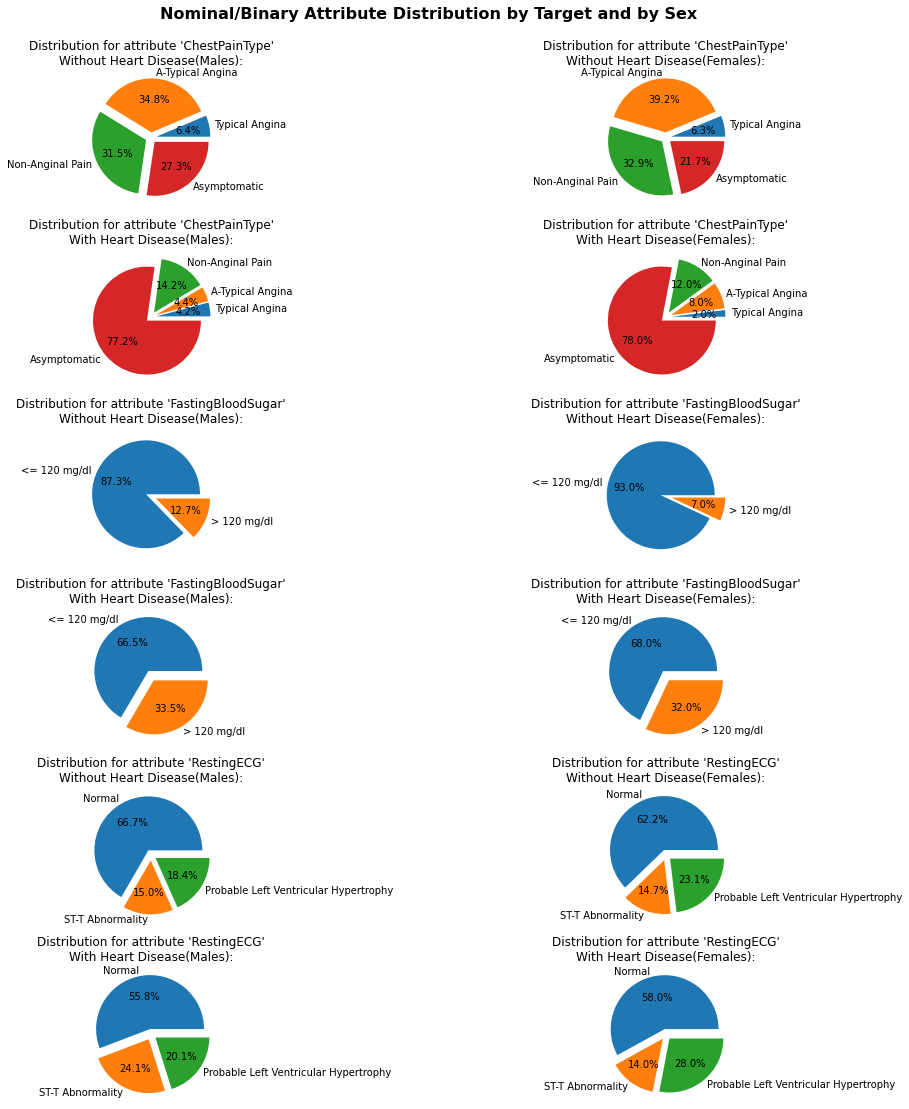

In [27]:
#Visualizing the distribution of the categorical attributes, by target and by sex
#For report purposes, breaking this up into two separate pages.
#This one for attributes 'ChestPainType', 'FastingBloodSugar', 'RestingECG'
#
ax=1
plt.figure(figsize=(15,30))
plt.axis('equal')
  
for col in ('ChestPainType', 'FastingBloodSugar', 'RestingECG'):
  plt.subplot(12,2,ax)
  these_labels = labels[col]
  plt.title(f"Distribution for attribute '{col}'\nWithout Heart Disease(Males):")
  plt.pie(no_heart_disease_male[col].value_counts().sort_index(),
        autopct = '%1.1f%%', labels=these_labels,
        explode=tuple([0.1] * len(these_labels)))
  ax+=1

  plt.subplot(12,2,ax)
  these_labels = labels[col]
  plt.title(f"Distribution for attribute '{col}'\nWithout Heart Disease(Females):")
  plt.pie(no_heart_disease_female[col].value_counts().sort_index(),
        autopct = '%1.1f%%', labels=these_labels,
        explode=tuple([0.1] * len(these_labels)))
  ax+=1

  plt.subplot(12,2,ax)
  these_labels = labels[col]
  plt.title(f"Distribution for attribute '{col}'\nWith Heart Disease(Males):")
  plt.pie(with_heart_disease_male[col].value_counts().sort_index(),
        autopct = '%1.1f%%', labels=these_labels,
        explode=tuple([0.1] * len(these_labels)))
  ax+=1

  plt.subplot(12,2,ax)
  these_labels = labels[col]
  plt.title(f"Distribution for attribute '{col}'\nWith Heart Disease(Females):")
  plt.pie(with_heart_disease_female[col].value_counts().sort_index(),
        autopct = '%1.1f%%', labels=these_labels,
        explode=tuple([0.1] * len(these_labels)))
  ax+=1

plt.suptitle('Nominal/Binary Attribute Distribution by Target and by Sex',y=1.01, size = 16, color = 'black', weight='bold')   
plt.tight_layout()
plt.savefig("nominal_dist_by_target_by_sex1.pdf",dpi=1200, bbox_inches='tight')

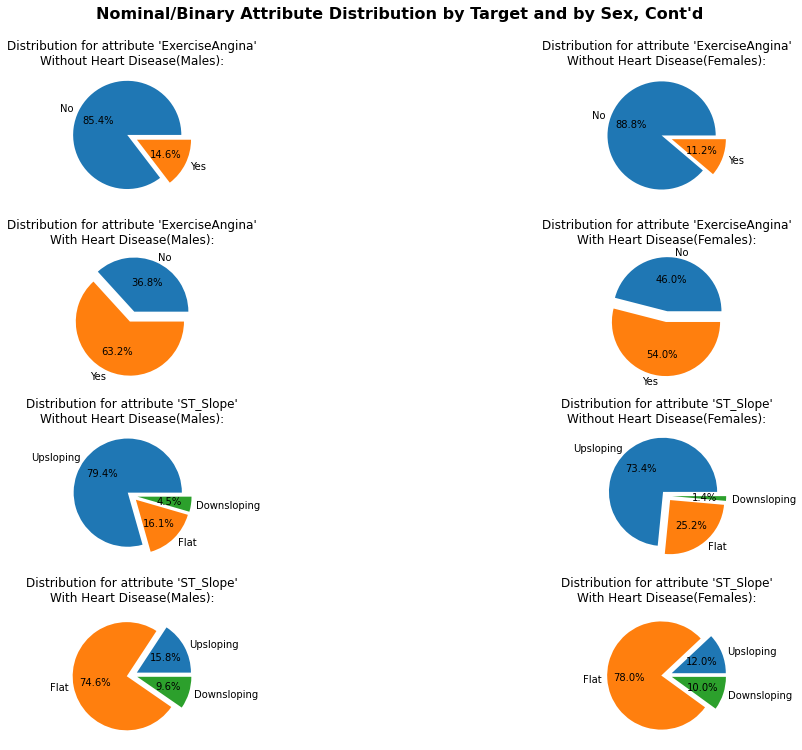

In [28]:
#Visualizing the distribution of the categorical attributes, by target and by sex
#For report purposes, breaking this up into two separate pages.
#This one for attributes 'ExerciseAngina','ST_Slope'
#
ax=1
plt.figure(figsize=(15,30))
plt.axis('equal')
  
for col in ('ExerciseAngina','ST_Slope'):
  plt.subplot(12,2,ax)
  these_labels = labels[col]
  plt.title(f"Distribution for attribute '{col}'\nWithout Heart Disease(Males):")
  plt.pie(no_heart_disease_male[col].value_counts().sort_index(),
        autopct = '%1.1f%%', labels=these_labels,
        explode=tuple([0.1] * len(these_labels)))
  ax+=1

  plt.subplot(12,2,ax)
  these_labels = labels[col]
  plt.title(f"Distribution for attribute '{col}'\nWithout Heart Disease(Females):")
  plt.pie(no_heart_disease_female[col].value_counts().sort_index(),
        autopct = '%1.1f%%', labels=these_labels,
        explode=tuple([0.1] * len(these_labels)))
  ax+=1

  plt.subplot(12,2,ax)
  these_labels = labels[col]
  plt.title(f"Distribution for attribute '{col}'\nWith Heart Disease(Males):")
  plt.pie(with_heart_disease_male[col].value_counts().sort_index(),
        autopct = '%1.1f%%', labels=these_labels,
        explode=tuple([0.1] * len(these_labels)))
  ax+=1

  plt.subplot(12,2,ax)
  these_labels = labels[col]
  plt.title(f"Distribution for attribute '{col}'\nWith Heart Disease(Females):")
  plt.pie(with_heart_disease_female[col].value_counts().sort_index(),
        autopct = '%1.1f%%', labels=these_labels,
        explode=tuple([0.1] * len(these_labels)))
  ax+=1

plt.suptitle('Nominal/Binary Attribute Distribution by Target and by Sex, Cont\'d',y=1.01, size = 16, color = 'black', weight='bold')   
plt.tight_layout()
plt.savefig("nominal_dist_by_target_by_sex2.pdf",dpi=1200, bbox_inches='tight')

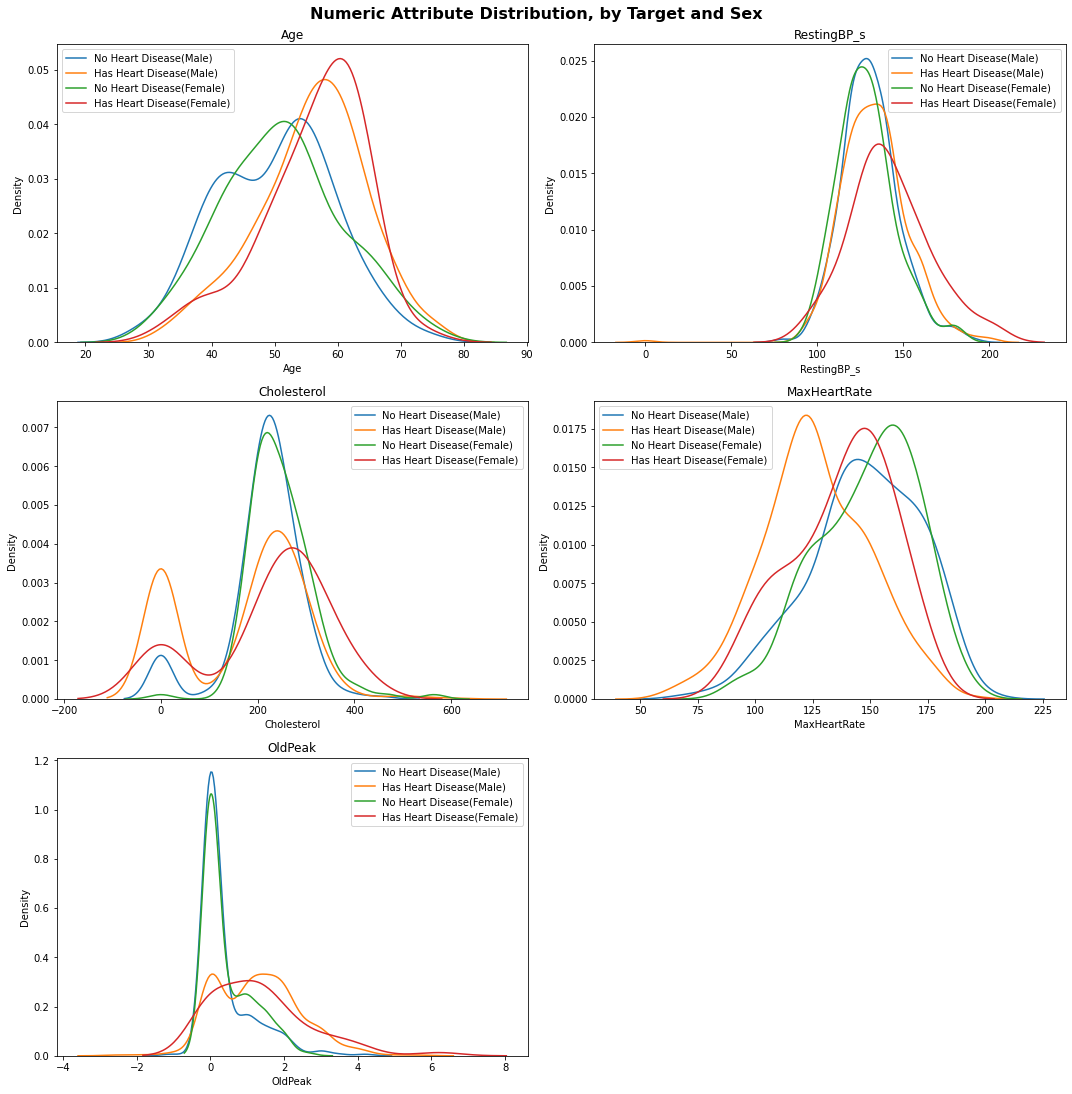

In [29]:
#Visualizing the distribution of the numerical attributes, by target and by sex
plt.figure(figsize=(15,15))

ax=1
for col in ('Age', 'RestingBP_s', 'Cholesterol', 'MaxHeartRate', 'OldPeak'):
    plt.subplot(3,2,ax)
    plt.title(col)
    sns.kdeplot(x=no_heart_disease_male[col],label = "No Heart Disease(Male)")
    sns.kdeplot(x=with_heart_disease_male[col],label = "Has Heart Disease(Male)")
    sns.kdeplot(x=no_heart_disease_female[col],label = "No Heart Disease(Female)")
    sns.kdeplot(x=with_heart_disease_female[col],label = "Has Heart Disease(Female)")
    plt.legend()
    ax += 1

plt.suptitle('Numeric Attribute Distribution, by Target and Sex',y=1.01, size = 16, color = 'black', weight='bold')   
plt.tight_layout()
plt.savefig("numeric_dist_by_target_by_sex.pdf",dpi=1200, bbox_inches='tight')

In [30]:
#Check for outliers on numeric attributes
#Using for outlier detection three methods. 
#Note: for the next stage in this project, Module 3, 
#one or more of these outlier detection methods will be used.
#For now, we only want to see how many outliers per attribute are detected with each approach.
#
#Methods: 
#  #1 1.5IQR range
#  #2 mean +/- 3*ST-DEV (same as GT Absolute(Z-Score))
#  #3 Rejecting those with a value of zero (based on visualization, only needed for 'Cholesterol')

def IQR1_5_upper(data, col):
  Q3 = np.quantile(data[col], 0.75)
  Q1 = np.quantile(data[col], 0.25)
  IQR = Q3 - Q1
  return(Q3+(1.5*IQR))

def IQR1_5_lower(data, col):
  Q3 = np.quantile(data[col], 0.75)
  Q1 = np.quantile(data[col], 0.25)
  IQR = Q3 - Q1
  return(Q1-(1.5*IQR))


for col in ('Age', 'RestingBP_s', 'Cholesterol', 'MaxHeartRate', 'OldPeak'):
  upper1 = IQR1_5_upper(df,col)
  lower1 = IQR1_5_lower(df,col)
  stdev3 = 3*df[col].std()
  mean = df[col].mean()
  upper2 = mean + stdev3
  lower2 = mean - stdev3

  these_outliers1 = df[(df[col] < lower1) | (df[col] > upper1)]
  these_outliers2 = df[(df[col] < lower2) | (df[col] > upper2)]
  these_outliers3 = df[df[col] == 0]
  
  print(f"For attribute '{col}': The mean is {mean}, stdev3 is {stdev3}")
  print(f"For 1.5IQR the lower range is {lower1} the upper range is {upper1}")
  print(f"For mean +/- 3STDEV the lower range is {lower2} the upper range is {upper2}")
  print(f"\n")

  print(f"Using 1.5IQR Method:")
  if (these_outliers1.shape[0] > 1):
    print(f"For attribute '{col}': There are {these_outliers1.shape[0]} outliers:\n")
    print(these_outliers1)
    print("\n")
  elif (these_outliers1.shape[0] == 1):
    print(f"For attribute '{col}': There is {these_outliers1.shape[0]} outlier:\n")
    print(these_outliers1)
    print("\n")
  else:
    print(f"For attribute '{col}': There are no outliers.\n")
    print("\n")

  print(f"Using mean +/- 3STDEV Method:")
  if (these_outliers2.shape[0] > 1):
    print(f"For attribute '{col}': There are {these_outliers2.shape[0]} outliers:\n")
    print(these_outliers2)
    print("\n")
  elif (these_outliers2.shape[0] == 1):
    print(f"For attribute '{col}': There is {these_outliers2.shape[0]} outlier:\n")
    print(these_outliers2)
    print("\n")
  else:
    print(f"For attribute '{col}': There are no outliers.\n")
    print("\n")

  if(col == 'Cholesterol'):
    print(f"Identifying 'zero' values(for 'Cholesterol') Method:")
    if (these_outliers3.shape[0] > 1):
      print(f"For attribute '{col}': There are {these_outliers3.shape[0]} outliers:\n")
      print(these_outliers3)
      print("\n")
    elif (these_outliers3.shape[0] == 1):
      print(f"For attribute '{col}': There is {these_outliers3.shape[0]} outlier:\n")
      print(these_outliers3)
      print("\n")
    else:
      print(f"For attribute '{col}': There are no outliers.\n")
      print("\n")

print("\n\n")




For attribute 'Age': The mean is 53.49509269356598, stdev3 is 28.276802628148687
For 1.5IQR the lower range is 27.5 the upper range is 79.5
For mean +/- 3STDEV the lower range is 25.218290065417293 the upper range is 81.77189532171467


Using 1.5IQR Method:
For attribute 'Age': There are no outliers.



Using mean +/- 3STDEV Method:
For attribute 'Age': There are no outliers.



For attribute 'RestingBP_s': The mean is 132.3773173391494, stdev3 is 55.54534158148466
For 1.5IQR the lower range is 90.0 the upper range is 170.0
For mean +/- 3STDEV the lower range is 76.83197575766476 the upper range is 187.92265892063406


Using 1.5IQR Method:
For attribute 'RestingBP_s': There are 28 outliers:

     Age  Sex  ChestPainType  RestingBP_s  Cholesterol  FastingBloodSugar  \
109   39    1              2          190          241                  0   
123   58    0              2          180          393                  0   
189   53    1              4          180          285              